# zero coke & temperature data analysis

* 데이터 출처 : https://www.booksr.co.kr/product/9788989383086/

+ 제로콜라의 수요를 예측할 수 있도록 하는 주요 특성 찾기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./data/coke.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       366 non-null    object 
 1   mean       366 non-null    float64
 2   min        365 non-null    float64
 3   max        366 non-null    float64
 4   zero_coke  366 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 14.4+ KB


In [3]:
df.head()

,date,mean,min,max,zero_coke
0,2021-09-24,21.8,16.7,26.9,58
1,2021-09-25,21.2,18.7,23.1,54
2,2021-09-26,22.6,18.4,27.3,77
3,2021-09-27,21.6,18.7,25.0,100
4,2021-09-28,21.5,19.6,24.4,77


In [7]:
df.tail()

,date,mean,min,max,zero_coke
361,2022-09-20,19.9,16.1,24.6,21
362,2022-09-21,19.4,13.0,25.6,21
363,2022-09-22,19.8,14.2,24.7,19
364,2022-09-23,17.5,14.7,22.2,14
365,2022-09-24,18.5,12.3,24.2,13


In [10]:
df.describe()

,mean,min,max,zero_coke
count,366.000000,365.000000,366.000000,366.000000
mean,13.556011,9.522466,18.236612,41.893443
std,10.749479,11.146055,10.566594,16.789824
min,-12.100000,-15.500000,-7.300000,6.000000
25%,5.025000,0.700000,9.300000,30.000000
50%,14.700000,10.400000,20.150000,44.000000
75%,22.875000,18.900000,27.275000,54.000000
max,30.900000,27.400000,36.100000,100.000000


* 데이터는 2021년 9월 24일 ~ 2022년 9월 24일 1년간 제로콜라의 판매량을 측정한 데이터이다.
* 평균 판매량은 약 41개이며, 6개 ~ 100개 사이의 판매량을 보여준다
* 판매량과 기온 사이에 어떤 상관관계가 있을지 간단하게 분석해보자

In [46]:
df.isnull().sum()

date         0
mean         0
min          1
max          0
zero_coke    0
dtype: int64

In [48]:
df[df['min'].isna()]

,date,mean,min,max,zero_coke
318,2022-08-08,26.8,NaN,28.4,23


In [50]:
df[(df['date'] > "2022-08-01") & (df['date'] < "2022-08-10")]

,date,mean,min,max,zero_coke
312,2022-08-02,26.8,25.5,28.5,18
313,2022-08-03,27.1,25.2,30.0,19
314,2022-08-04,28.9,26.0,32.9,18
315,2022-08-05,29.4,27.0,32.7,15
316,2022-08-06,28.7,27.4,30.3,12
317,2022-08-07,28.9,27.2,31.7,20
318,2022-08-08,26.8,NaN,28.4,23
319,2022-08-09,25.1,22.0,26.5,20


In [52]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

date         0
mean         0
min          0
max          0
zero_coke    0
dtype: int64

* 최저 기온에 결측치 존재
* 날짜마다 기온이 다 다르고, 결측치가 1개만 존재하기에 삭제 후 진행

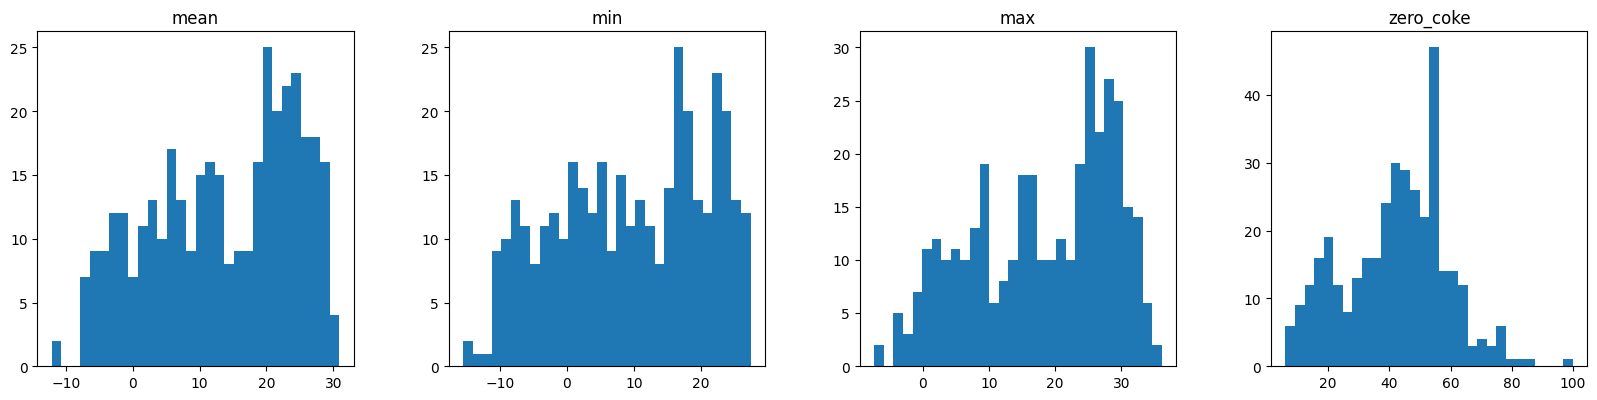

In [55]:
import matplotlib.pyplot as plt

df.hist(figsize=(20, 10), grid=False, layout=(2, 4), bins = 30)
plt.show()

* 제로콜라와 기온의 상관관계는 대체적으로 왼쪽으로 치우친 분포를 보여주고 있다

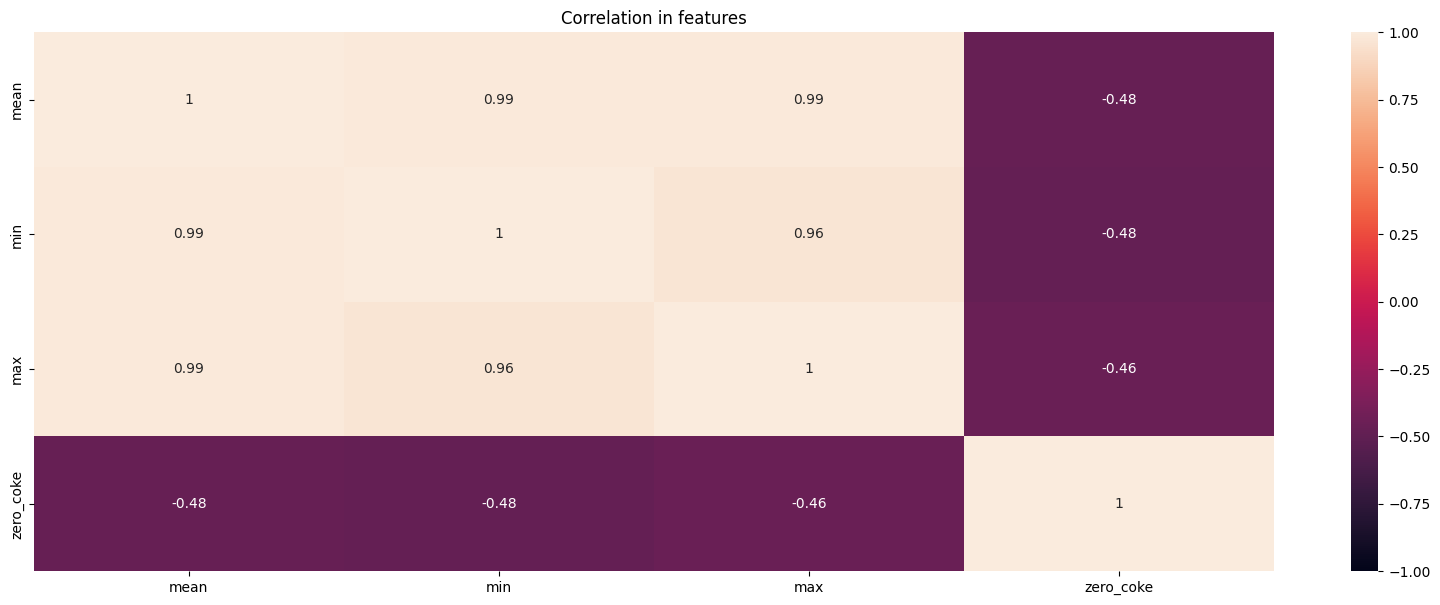

In [64]:
num_features = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20, 7))
sns.heatmap(df[num_features].corr(), annot = True, vmin=-1, vmax=1)
plt.title("Correlation in features")
plt.show()

* heatmap으로 확인시, 제로콜라와 기온 변수들 간 관계는 다소 높은 음의 상관관계를 가진다는 것을 파악할 수 있다.
* 기온이 낮은 겨울철에는 제로콜라의 판매량이 더 많아지고 여름철에는 판매량이 적어진다는 의미로도 해석이 가능하다.